In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import seaborn as sns

In [4]:
import numpy as np
df['Outcome'] = np.where(df['Outcome'] == 1 , "Diabetic" , "No Diabetic")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,Diabetic
1,0,84,82,31,125,38.2,0.233,23,No Diabetic
2,0,145,0,0,0,44.2,0.630,31,Diabetic
3,0,135,68,42,250,42.3,0.365,24,Diabetic
4,1,139,62,41,480,40.7,0.536,21,No Diabetic


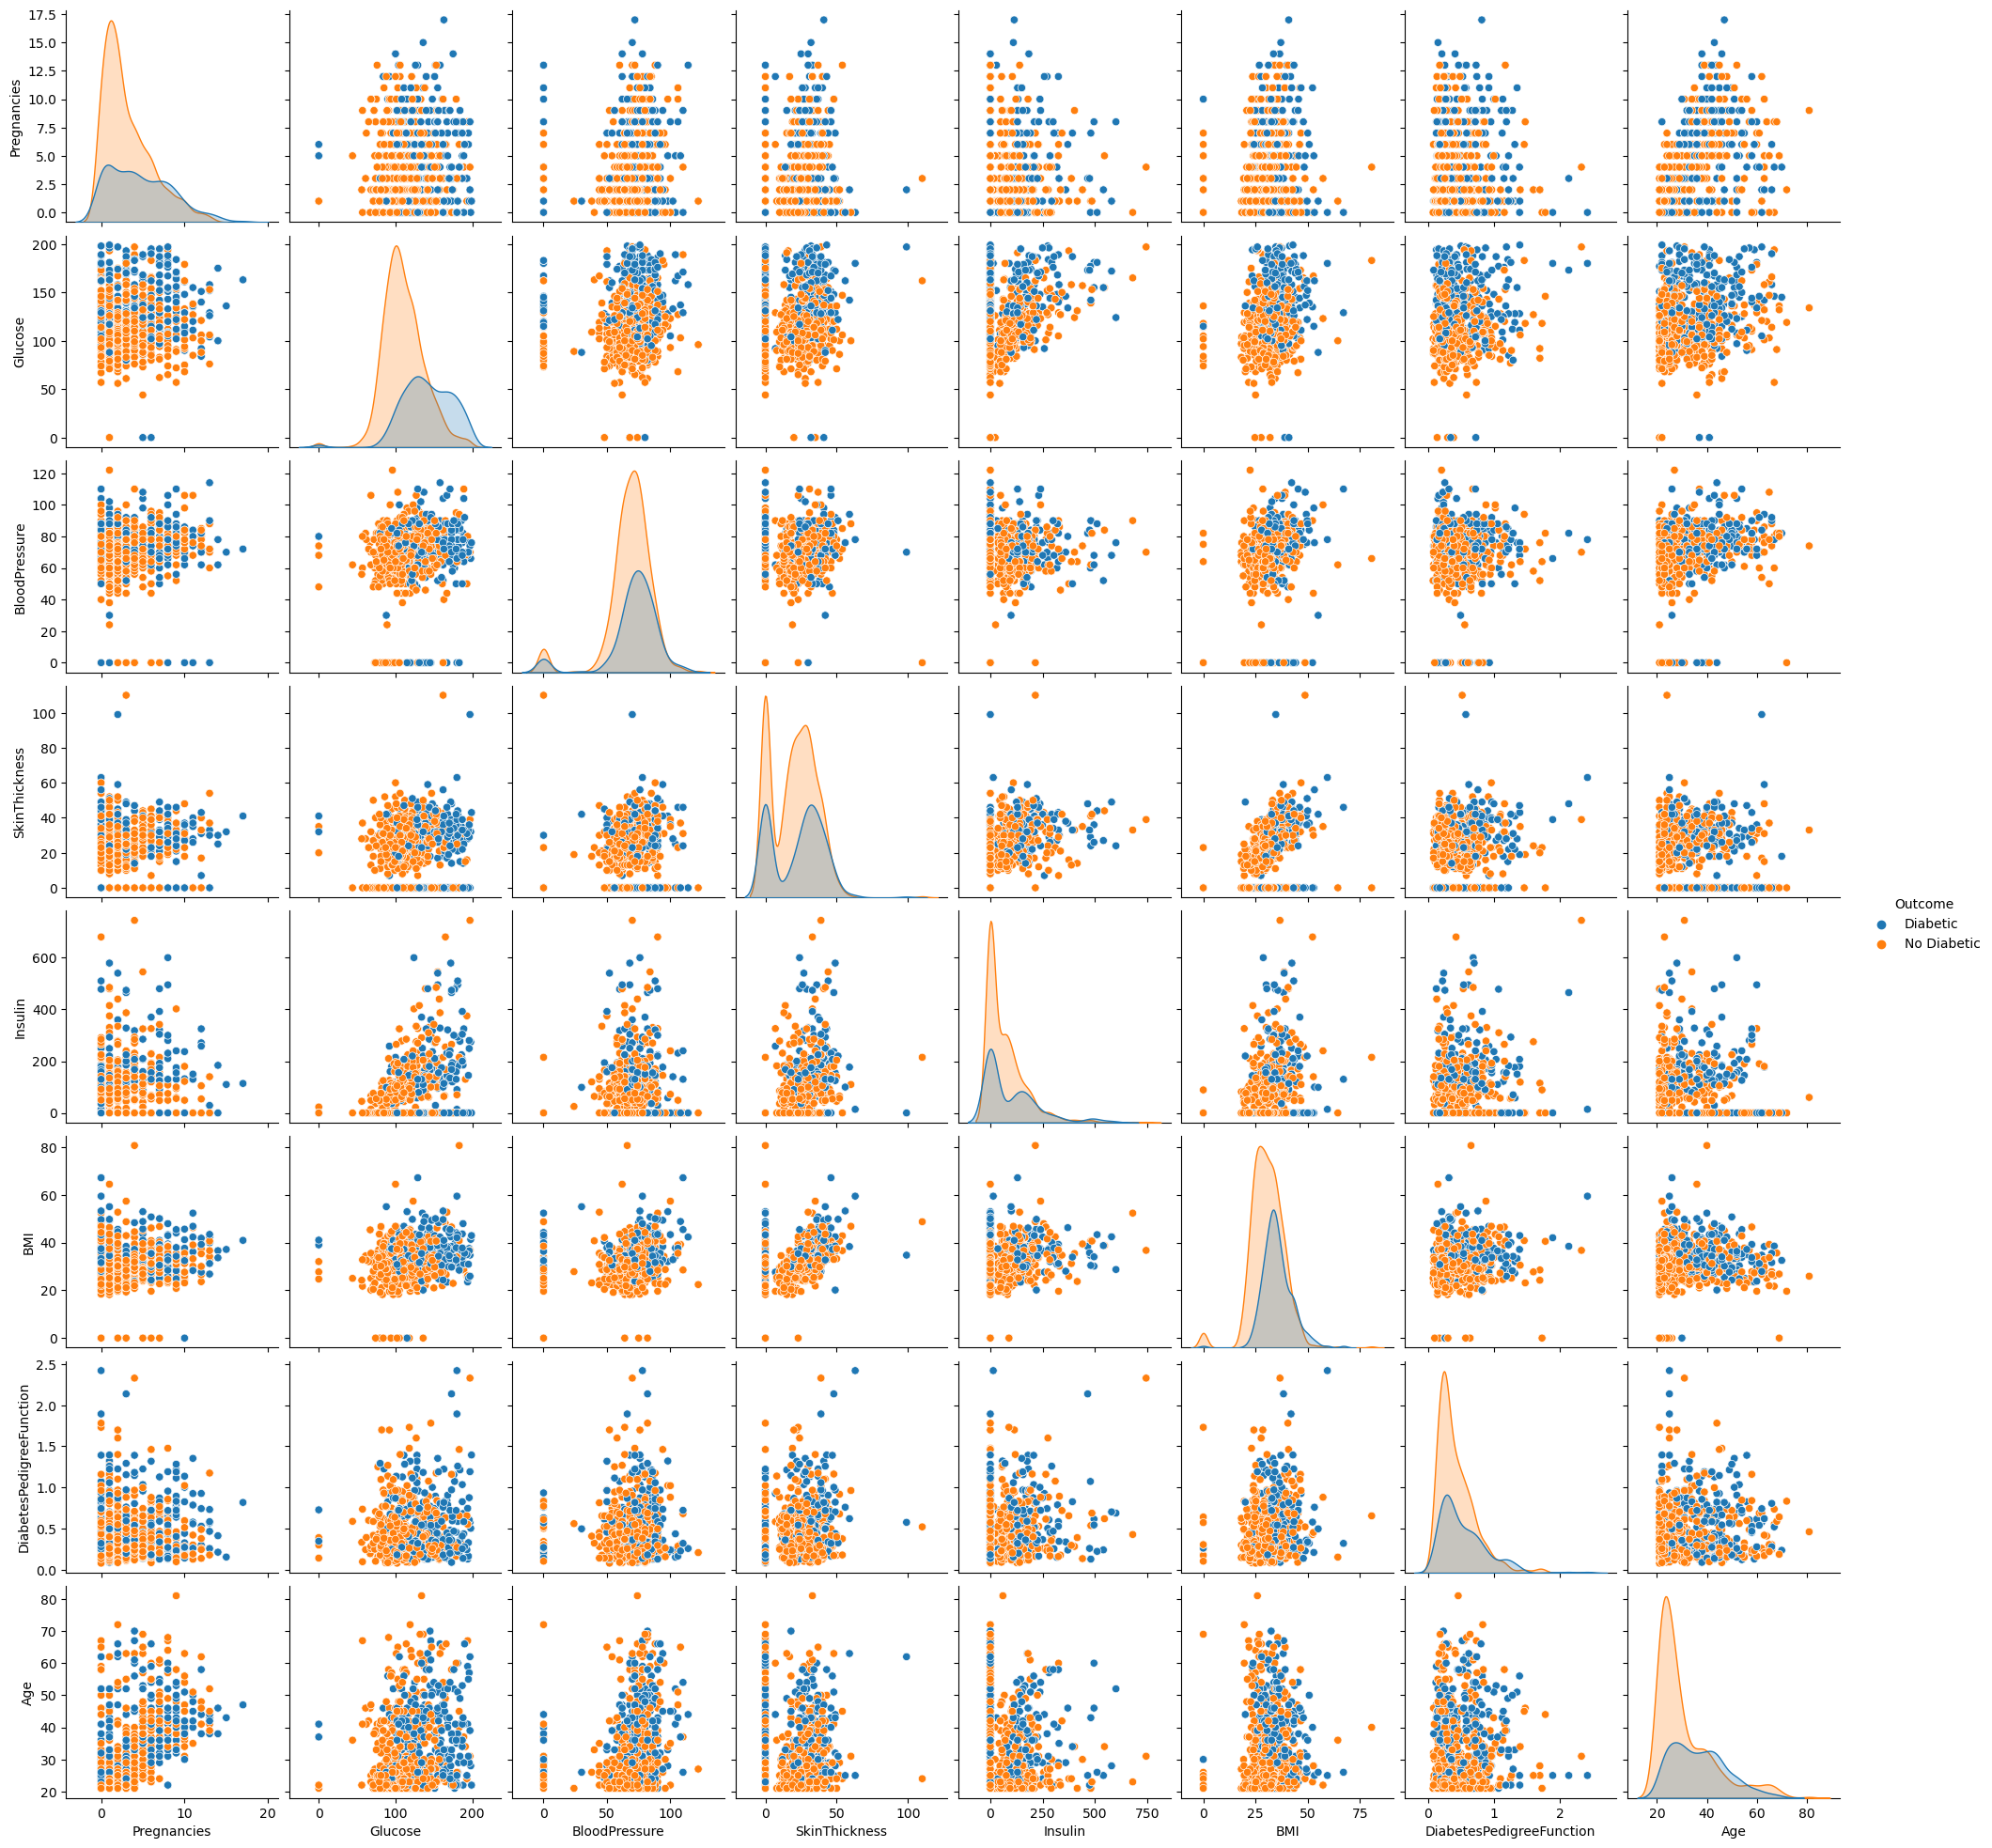

In [6]:
sns.pairplot(df,hue ="Outcome")

In [7]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
X =df.drop('Outcome' , axis =1).values ###independent features
y =df['Outcome'].values  ###dependent features


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:

import torch
import torch.nn as nn
import torch.nn.functional as F


In [11]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [12]:
df.shape


(2000, 9)

In [13]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [14]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [15]:
model.parameters


<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [16]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4783871173858643
Epoch number: 11 and the loss : 0.8106853365898132
Epoch number: 21 and the loss : 0.5979866981506348
Epoch number: 31 and the loss : 0.5902875661849976
Epoch number: 41 and the loss : 0.5759479999542236
Epoch number: 51 and the loss : 0.5604172348976135
Epoch number: 61 and the loss : 0.5482443571090698
Epoch number: 71 and the loss : 0.5358822345733643
Epoch number: 81 and the loss : 0.5261450409889221
Epoch number: 91 and the loss : 0.5182623863220215
Epoch number: 101 and the loss : 0.5110141634941101
Epoch number: 111 and the loss : 0.5044927000999451
Epoch number: 121 and the loss : 0.4984182119369507
Epoch number: 131 and the loss : 0.49080145359039307
Epoch number: 141 and the loss : 0.4847182035446167
Epoch number: 151 and the loss : 0.4763152599334717
Epoch number: 161 and the loss : 0.46829143166542053
Epoch number: 171 and the loss : 0.4609490633010864
Epoch number: 181 and the loss : 0.4568401277065277
Epoch number: 191 and

In [18]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

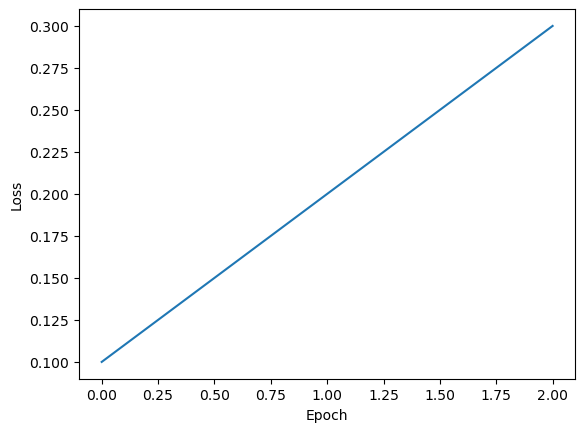

In [19]:
import matplotlib.pyplot as plt
import torch

# example tensor
final_losses = torch.tensor([0.1, 0.2, 0.3], requires_grad=True)

# example plot
epochs = 3
plt.plot(range(epochs), final_losses.detach().numpy())
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [20]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())


0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
0
1
1
1
0
1
0
1
1
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
0
1
1
1
0
0
1
1
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
1
0
1
1
0
0


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[224,  48],
       [ 43,  85]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

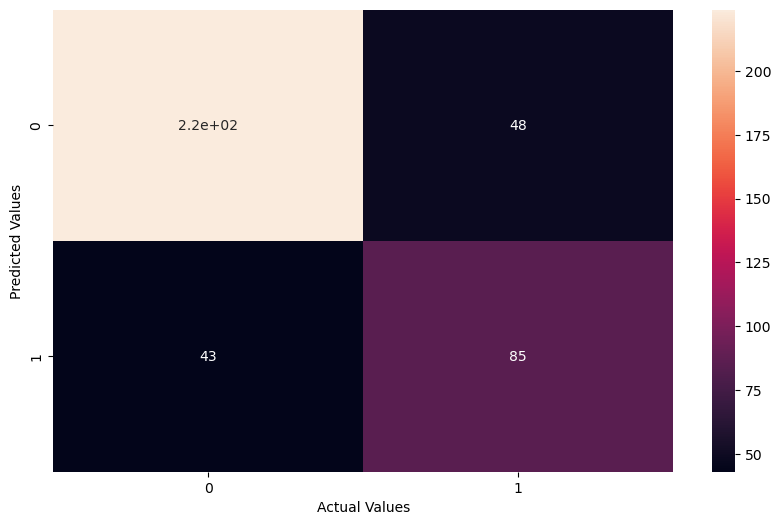

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [23]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7725

In [24]:
#### Save the model
torch.save(model,'diabetes.pt')

In [25]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [26]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [27]:
### Predcition of new data point
list(df.iloc[0,:-1])

[2.0, 138.0, 62.0, 35.0, 0.0, 33.6, 0.127, 47.0]

In [28]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [29]:
new_data=torch.tensor(lst1)


In [30]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.5045, 1.4750])
0
